# Heart Failure Prediction

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated **17.9 million lives each year**, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

In this project we aim to design a AI model able to predict death occurence in CVD's cases based on multiple factors such as sex, age, smoking and so on.

# Import Libraries

In [2]:

#Data Manipulation
import pandas as pd
import numpy as np

#AI Process
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
import keras
from sklearn.compose import ColumnTransformer
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import InputLayer, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns


# I) Loading Data

In [3]:
#Import dataset
df = pd.read_csv('/Users/lebryx/Downloads/heart_failure_clinical_records_dataset.csv')
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# II) Data Exploratory & Cleanning



- Dataset info info 
- Correlation matrix

In [13]:
#Get datasetinfo :
print(df.info())
print('Dataset dimension:',df.shape)
print('Missing values:',df.isna().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
None
Dataset dimen

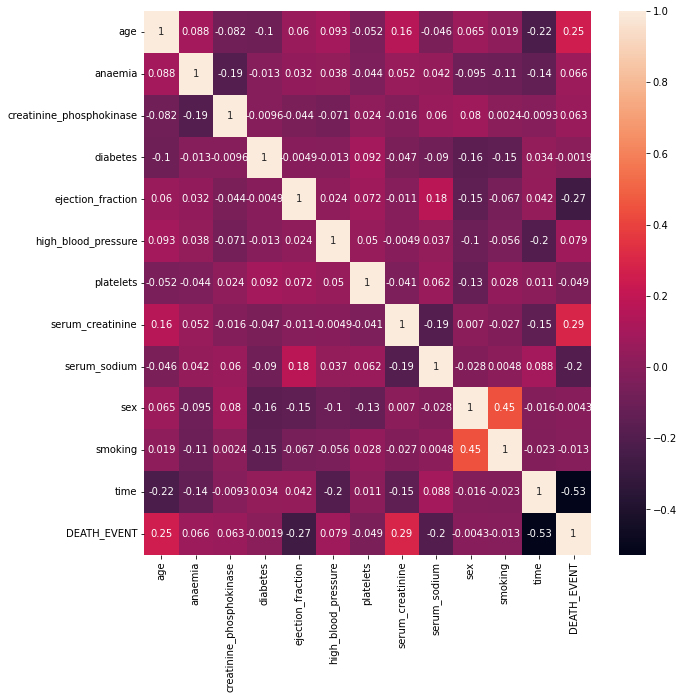

In [4]:
#Correlation matrix
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot=True);

- Our variables are weakly correlated each other.

In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


''

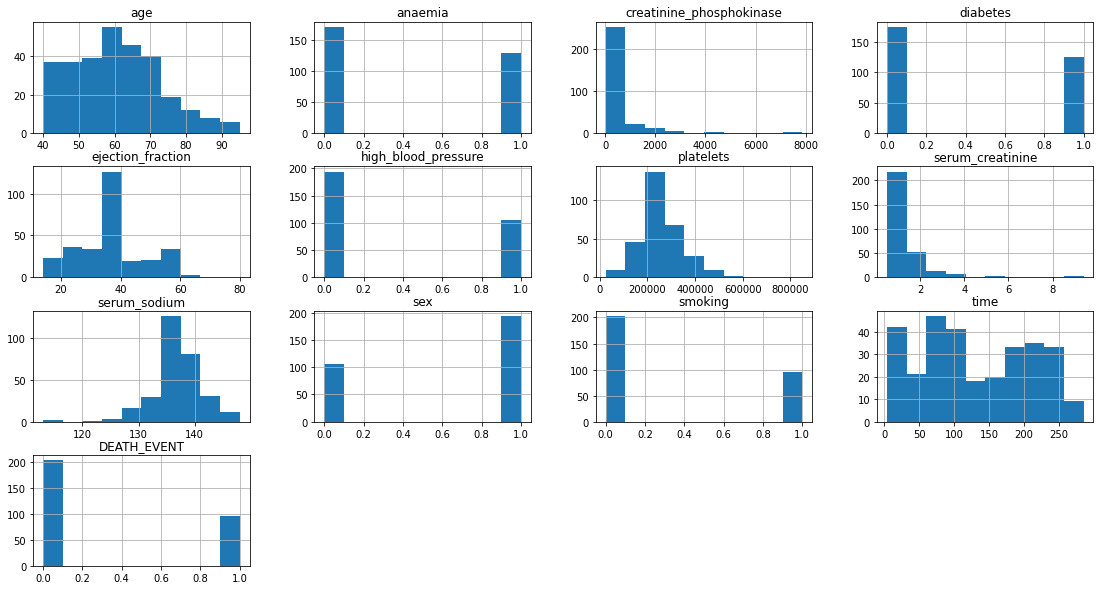

In [6]:
#Outlier detection
df.hist(figsize = (19,10))
;

**Label set**:
- There are half as many death event as no death event.

**Outliers**:
- creatinine_phosphokinase above 4000
- Ejection_fraction above 60
- platelets above  600000
- serum_cretatine above 4
- serum_sodium below 130


# III) Data preprocessing

**Data cleanning**

In [7]:
# Outlier removing 
df_c = df[df['creatinine_phosphokinase']< 3000]
df_c = df[df['ejection_fraction']< 60]
df_c = df[df['platelets']< 500000]
df_c = df[df['serum_creatinine']< 4]
df_c = df[df['serum_sodium']> 130]

#information loss 
print(df_c.shape)

(277, 13)


In [8]:
#Feature & Label Split
y = df_c['DEATH_EVENT']
x = df_c.drop('DEATH_EVENT',axis = 1)

In [9]:
# Feature One Hot Encoding 
x = pd.get_dummies(x)

#Train test split
X_train, X_test, Y_train, Y_test = train_test_split(x,y , test_size = 0.2,random_state = 42)

#)Feature Standardization
from sklearn.preprocessing import StandardScaler
ct = ColumnTransformer([('numeric', StandardScaler(), 
['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time'])])

X_train = ct.fit_transform(X_train)
X_test= ct.transform(X_test)

In [10]:
#Label Encoder
le = LabelEncoder()

Y_train = le.fit_transform(Y_train.astype(str)) 
Y_test = le.transform(Y_test.astype(str))

Y_train = to_categorical(Y_train,dtype = 'int64') 
Y_test = to_categorical(Y_test,dtype ='int64') 

# IV) Models

## 1) ANN

### a- Design

In [11]:
# Model: Neural Network 
def create_model(hidden_layers=2,hidden_layers_2 = 1, units=16,units_2 = 64, optimizer='rmsprop', activation1 = 'relu', activation2 = 'relu', final_activation = 'sigmoid'):
    model = Sequential()
    model.add(InputLayer(input_shape=(X_train.shape[1],)))
    for i in range(hidden_layers):
        model.add(Dense(units, activation=activation1))
    for i in range(hidden_layers_2):
        model.add(Dense(units_2, activation= activation2))
    model.add(Dense(2, activation= final_activation))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

**Model wrapping**


In [12]:
# Instance of the KerasClassifier wrapping our Neural Net model
keras_clf = KerasClassifier(create_model,hidden_layers =3, 
units =16 ,units_2 =64 ,hidden_layers_2 =1 , 
epochs=70, batch_size=32,
activation1 = 'relu', 
activation2 = 'relu',
 final_activation = 'sigmoid',
  verbose=0)

**Hyperparameter Spcace**

In [13]:
#Hyperparameters Space 
param_grid = {'hidden_layers': [1,2,3,4],
            'hidden_layers_2': [0,1,2,3],
            'units_2': [8, 16, 32, 64],
              'units': [8, 16, 32, 64],
              'activation1': ['relu','sigmoid','tanh'],
              'activation2': ['relu','sigmoid','tanh'],
              'optimizer': ['adam','rmsprop'],
            'batch_size': np.arange(10,85,1),
            'epochs': np.arange(10,200,1)}

**CV Search**

In [14]:
#Early stop
stop =EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
callbacks=[stop] #Inside the fit function

In [15]:
# RandomSearchCV object
grid_search = RandomizedSearchCV(keras_clf, param_distributions=param_grid, cv=10, scoring='recall')

# Fit the grid search object on the training data
grid_search.fit(X_train, Y_train)

# Get the best parameters
best_params = grid_search.best_params_

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1913, in recall_score
 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1913, in recall_score
 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1913, in recall_score
 

**Tunned model**

In [16]:
#ANN tunned
best_model = create_model(hidden_layers=best_params['hidden_layers'],
units=best_params['units'], 
optimizer=best_params['optimizer'])

### b-  Trainning 

Once we get the bests parameters we enter them into the ANN model. 

We've notice our label set is imbalanced, so we define a class weight before trainning our model.

In [17]:
# Class weight 
weight = {0:1, 1:2}

In [18]:
# Fit the best model on the entire dataset
history = best_model.fit(X_train, Y_train, 
class_weight= weight,
epochs = best_params['epochs'], 
batch_size = best_params['batch_size'],
validation_split=0.3)

Epoch 1/86
3/3 [==============================] - 1s 107ms/step - loss: 0.9052 - accuracy: 0.3442 - val_loss: 0.7078 - val_accuracy: 0.4030
Epoch 2/86
3/3 [==============================] - 0s 17ms/step - loss: 0.8793 - accuracy: 0.4935 - val_loss: 0.6894 - val_accuracy: 0.4776
Epoch 3/86
3/3 [==============================] - 0s 17ms/step - loss: 0.8558 - accuracy: 0.5714 - val_loss: 0.6714 - val_accuracy: 0.5522
Epoch 4/86
3/3 [==============================] - 0s 17ms/step - loss: 0.8345 - accuracy: 0.6494 - val_loss: 0.6540 - val_accuracy: 0.6119
Epoch 5/86
3/3 [==============================] - 0s 18ms/step - loss: 0.8144 - accuracy: 0.6883 - val_loss: 0.6370 - val_accuracy: 0.6567
Epoch 6/86
3/3 [==============================] - 0s 17ms/step - loss: 0.7947 - accuracy: 0.7143 - val_loss: 0.6210 - val_accuracy: 0.7015
Epoch 7/86
3/3 [==============================] - 0s 17ms/step - loss: 0.7756 - accuracy: 0.7208 - val_loss: 0.6061 - val_accuracy: 0.7164
Epoch 8/86
3/3 [==========

**Prediction**

In [19]:
best_model_predict = best_model.predict(X_test) # binary from
best_model_predict  = np.argmax(best_model_predict,axis = 1) # singleton form

2/2 [==============================] - 0s 3ms/step


#### **Performance monitoring**

''

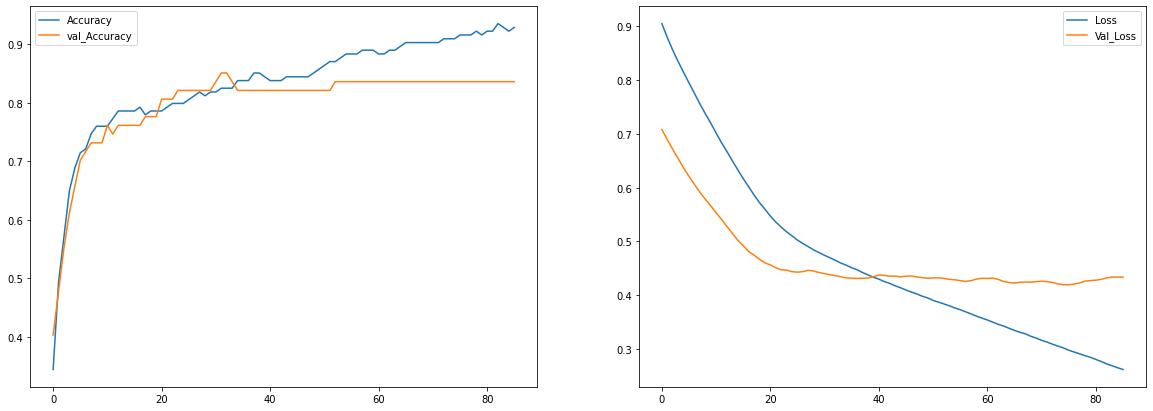

In [20]:
epochs = range(len(history.history['loss']))

# Visualization ANN
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.plot(epochs,history.history['accuracy'], label  = 'Accuracy')
plt.plot(epochs,history.history['val_accuracy'], label  = 'val_Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs,history.history['loss'], label = 'Loss')
plt.plot(epochs,history.history['val_loss'], label = 'Val_Loss')
plt.legend()
;

The model seems to experience overfitting.

## 2) Extrem Gradient Boosting (XGBoost)

### Design

In [21]:
# Model : XgboostClassifier 
from  xgboost import XGBClassifier
xgb = XGBClassifier()

**Hyperparameter Space**

In [22]:
#Parameters
param_grid = {'max_depth': [1,2,3,4,5, 6, 9],
'learning_rate': [0.1, 0.01],
'n_estimators': [100, 500],
'subsample': [0.8,0.9, 1.0],
'scale_pos_weight': [1,2,3, 5, 10]}

**CV Search**

In [23]:
#GridSearchCV Object
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)

#Fit Grid search to find best params
grid_search.fit(X_train, Y_train)

# Print xgboost the best hyperparameters
xgb_bp = grid_search.best_params_


In [24]:
#Tunned Xgboost 
xgb_t = XGBClassifier(learning_rate = xgb_bp['learning_rate'], 
max_depth= xgb_bp['max_depth'],
n_estimators= xgb_bp['n_estimators'], 
scale_pos_weight= xgb_bp['scale_pos_weight'],
subsample= xgb_bp['subsample'])

### b- Trainning

In [25]:
#Xgboost tunned trainning
xgb_t.fit(X_train, Y_train)
xgb_t_pred = np.argmax(xgb_t.predict(X_test), axis = 1)

## 3)  Decision Trees

DecisionTreeClassifier is sensitiveless to scale variation.

### a- Design

In [26]:
#Package 
from sklearn.tree import DecisionTreeClassifier

# Model: Decision Trees
dtc = DecisionTreeClassifier(criterion ='gini' ,max_depth= 4, random_state = 310)

#Hyperparameter Space
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [None, 1, 2, 3, 4, 5],
              'min_samples_split': [2,3,4,5],
              'min_samples_leaf': [1,2,3,4,5], # Remettre echèle moinszzzzzz
              'random_state': [42]}

In [27]:
#CV_Seach  
grid_search_dtc = GridSearchCV(dtc, param_grid=param_grid, cv=10, scoring='accuracy')

grid_search_dtc.fit(X_train, Y_train)

best_params = grid_search_dtc.best_params_
best_score = grid_search_dtc.best_score_

In [28]:
#New Model: dtc Tuned
best_dtc = DecisionTreeClassifier(
min_samples_leaf= best_params['min_samples_leaf'],
min_samples_split=best_params['min_samples_split'],
max_depth = best_params['max_depth'],
random_state = best_params['random_state'])

### b- Trainning 

In [29]:
best_dtc.fit(X_train, Y_train)
dtc_pred = best_dtc.predict(X_test)
dtc_pred = np.argmax(dtc_pred, axis = 1)

# V) Conclusion

All of our models have been train with theirs bests parameters. We are now comparing their performance thanks to the **classification_report** method of scikit-learn.

In [30]:
y_true = np.argmax(Y_test, axis = 1)
#ANN best 
print('ANN')
print(classification_report(y_true ,best_model_predict))

#Xgboost Evalutation
print('Xgboost')
print(classification_report(y_true,xgb_t_pred))

#Decision Trees
print("Decision trees")
print(classification_report(y_true,dtc_pred))

ANN
              precision    recall  f1-score   support

           0       0.94      0.82      0.88        39
           1       0.68      0.88      0.77        17

    accuracy                           0.84        56
   macro avg       0.81      0.85      0.82        56
weighted avg       0.86      0.84      0.84        56

Xgboost
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        39
           1       0.82      0.82      0.82        17

    accuracy                           0.89        56
   macro avg       0.87      0.87      0.87        56
weighted avg       0.89      0.89      0.89        56

Decision trees
              precision    recall  f1-score   support

           0       0.88      0.97      0.93        39
           1       0.92      0.71      0.80        17

    accuracy                           0.89        56
   macro avg       0.90      0.84      0.86        56
weighted avg       0.90      0.89      0.89    

Because of our context which is death event prediction, we focus on metrics that are sensitive to the minority class. These metrics are **precision**, **recall**, and **F1-score**.

**Comments**

- ***ANN***: Best recall but the worst precision.

- **Xgboost** Pretty good precision and recall.

- **Decision trees**: Best precision but pretty bad recall.

When it comes to predict death event case, **Xgboost get the best score**. So we should choose it for deployment.

Further, to increase the models performance we can:

- Get more data
- Do Aaditionnal feature engineering
- Try other models.